***
# 3.4 Analyse de la qualité des images
***

## 3.4.1 Création d’un DataFrame spécifique à une analyse des paramètres qualitatifs des images

In [1]:
#Importation des librairies nécessaires
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from tabulate import tabulate
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib inline
import seaborn as sns
sns.set_theme()


In [2]:
#Chemin root des 3 splits de New Plant Disease
root_pict_chk = "C:\\Users\\flore\\Jupyter\\Recog_Plant_Disease\\Datasets\\NPD\\"

#Chemin des données du split train de New Plant Disease
valid_pict_chk = "C:\\Users\\flore\\Jupyter\\Recog_Plant_Disease\\Datasets\\NPD\\train"

#Chemin des données du split valid de New Plant Disease
train_pict_chk = "C:\\Users\\flore\\Jupyter\\Recog_Plant_Disease\\Datasets\\NPD\\valid"

#Chemin des données du split test de New Plant Disease
test_pict_chk = "C:\\Users\\flore\\Jupyter\\Recog_Plant_Disease\\Datasets\\NPD\\test"


__A noter :__
  
Afin de suivre la disposition des répertoires qui se trouvent dans les dossiers "valid" et "train", c'est à dire des dossiers ayant une convention de nommage liée au type de de plante, un sous-dossier a été créé dans le répertoire "test" et qui se nomme "Test___Pictures_Random", cela afin de permettre l'ajout des noms de répertoire et de répertoire parent (le split) dans le DataFrame qui nous servira à l'analyse des données de qualité des images.
  

Ce dossier « Test___Pictures_Random » est donc le seul qui ne correspond à aucun type de plante dans le Dataframe.
***

__Création d'une fonction permettant l'extraction d'informations liées à la qualité des images contenues dans tous les sous-répertoires d'un répertoire root donné__

In [3]:
def extract_img_property_from_folder(rep_racine):
    
    #Fonction permettant l'extraction d'informations liées à la qualité d'une image
    def extract_image_properties(image_path):
        properties = {}

        #Informations sur l'image
        properties['Chemin'] = image_path
        properties['Date de création'] = datetime.fromtimestamp(os.path.getctime(image_path))
        properties['Date de modification'] = datetime.fromtimestamp(os.path.getmtime(image_path))

        #Charge l'image avec OpenCV
        image = cv2.imread(image_path)

        #Dimensions de l'image
        height, width, channels = image.shape
        properties['Hauteur'] = height
        properties['Largeur'] = width
        properties['Canaux'] = channels

        #Taille du fichier
        size_bytes = os.path.getsize(image_path)
        properties['Taille du fichier (en octets)'] = size_bytes

        #Résolution de l'image
        with Image.open(image_path) as img:
            properties['Résolution'] = img.info.get('dpi')

        #Mode, profondeur de couleur et format de fichier
        img_pil = Image.fromarray(image)
        properties['Mode'] = img_pil.mode
        properties['Profondeur de couleur (en bits)'] = image.dtype.itemsize * 8
        properties['Format de fichier'] = os.path.splitext(image_path)[1]

        #Propriétés de couleurs de l'image
        b, g, r = cv2.split(image)
        properties['Moyenne R'] = r.mean()
        properties['Moyenne G'] = g.mean()
        properties['Moyenne B'] = b.mean()
    
        #Nom de fichier sans l'extension
        file_name = os.path.splitext(os.path.basename(image_path))[0]
        properties['Nom de fichier'] = file_name

        #Nom du répertoire parent
        parent_folder = os.path.basename(os.path.dirname(image_path))
        properties['Répertoire parent'] = parent_folder

        #Nom du répertoire parent du répertoire parent
        grandparent_folder = os.path.basename(os.path.dirname(os.path.dirname(image_path)))
        properties['Nom du Split'] = grandparent_folder

        return properties

    
    image_properties_list = []

    #Parcoure tous les fichiers du dossier et de ses sous-dossiers
    for root, dirs, files in os.walk(rep_racine):
        for file in files:
            # Vérifier si le fichier est une image
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_path = os.path.join(root, file)
                properties = extract_image_properties(image_path)
                image_properties_list.append(properties)

    # Création du dataframe
    df = pd.DataFrame(image_properties_list)

    # Réarrangement de l'ordre des colonnes  
    columns_order = ['Nom du Split', 'Répertoire parent', 'Nom de fichier', 'Format de fichier', 'Taille du fichier (en octets)', 
                     'Largeur', 'Hauteur', 'Canaux', 'Mode', 'Profondeur de couleur (en bits)', 'Résolution',
                     'Moyenne R', 'Moyenne G', 'Moyenne B', 'Chemin', 'Date de création', 'Date de modification']
    
    df = df[columns_order]

    return df


In [4]:
# Extraction des propriétés des images
all_pict_quality_chk = extract_img_property_from_folder(root_pict_chk)


In [5]:
all_pict_quality_chk


,Nom du Split,Répertoire parent,Nom de fichier,Format de fichier,Taille du fichier (en octets),Largeur,Hauteur,Canaux,Mode,Profondeur de couleur (en bits),Résolution,Moyenne R,Moyenne G,Moyenne B,Chemin,Date de création,Date de modification
0,test,Test___Pictures_Random,AppleCedarRust1,.JPG,8421,256,256,3,RGB,8,None,224.880707,242.000870,192.022644,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:04:08.097349,2019-10-12 07:40:42
1,test,Test___Pictures_Random,AppleCedarRust2,.JPG,11974,256,256,3,RGB,8,None,119.168701,130.907349,111.657791,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:04:08.100350,2019-10-12 07:40:42
2,test,Test___Pictures_Random,AppleCedarRust3,.JPG,11061,256,256,3,RGB,8,None,132.262314,134.308014,117.257828,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:04:08.102554,2019-10-12 07:40:42
3,test,Test___Pictures_Random,AppleCedarRust4,.JPG,11410,256,256,3,RGB,8,None,124.777802,130.335510,107.639877,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:04:08.104058,2019-10-12 07:40:42
4,test,Test___Pictures_Random,AppleScab1,.JPG,9022,256,256,3,RGB,8,None,116.056549,132.605942,90.652832,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:04:08.107062,2019-10-12 07:40:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87895,valid,Tomato___Tomato_Yellow_Leaf_Curl_Virus,ff2bb757-d8ac-43df-8161-4c2ef1806055___UF.GRC_...,.JPG,9516,256,256,3,RGB,8,None,100.087051,116.938156,66.514267,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:16:36.229763,2019-10-12 07:40:40
87896,valid,Tomato___Tomato_Yellow_Leaf_Curl_Virus,ff46311d-9868-4313-8834-eaf2f3259b27___UF.GRC_...,.JPG,7842,256,256,3,RGB,8,None,111.345566,125.170654,71.593918,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:16:36.240270,2019-10-12 07:40:40
87897,valid,Tomato___Tomato_Yellow_Leaf_Curl_Virus,ff8a2419-99e2-4bb8-ba94-691cb9773930___YLCV_GC...,.JPG,12821,256,256,3,RGB,8,None,90.657852,103.042206,86.823959,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:16:36.250614,2019-10-12 07:40:40
87898,valid,Tomato___Tomato_Yellow_Leaf_Curl_Virus,ff8ddc21-4c78-48cf-b608-50d9e148667d___YLCV_GC...,.JPG,17681,256,256,3,RGB,8,None,110.214478,118.254974,95.133270,C:\Users\flore\Jupyter\Recog_Plant_Disease\Dat...,2023-06-16 11:16:36.259176,2019-10-12 07:40:40


In [6]:
all_pict_quality_chk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87900 entries, 0 to 87899
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Nom du Split                     87900 non-null  object        
 1   Répertoire parent                87900 non-null  object        
 2   Nom de fichier                   87900 non-null  object        
 3   Format de fichier                87900 non-null  object        
 4   Taille du fichier (en octets)    87900 non-null  int64         
 5   Largeur                          87900 non-null  int64         
 6   Hauteur                          87900 non-null  int64         
 7   Canaux                           87900 non-null  int64         
 8   Mode                             87900 non-null  object        
 9   Profondeur de couleur (en bits)  87900 non-null  int64         
 10  Résolution                       0 non-null      object   

## 3.4.2 Analyse des données de qualité recueillie à partir du dataframe créé

### 3.4.2.1 Vérification du type des fichiers images

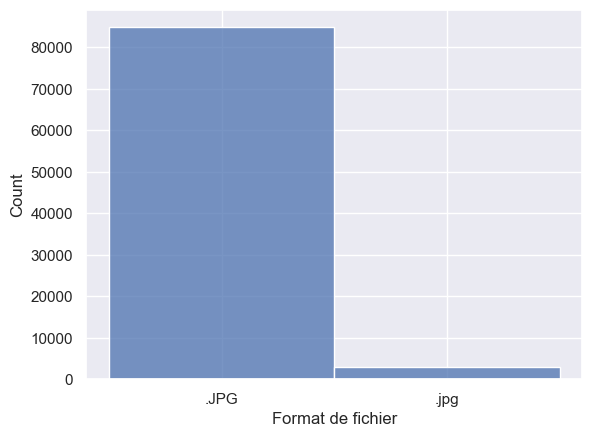

In [7]:
sns.histplot(all_pict_quality_chk['Format de fichier']);

### 3.4.2.2	Vérification de la taille des fichiers images

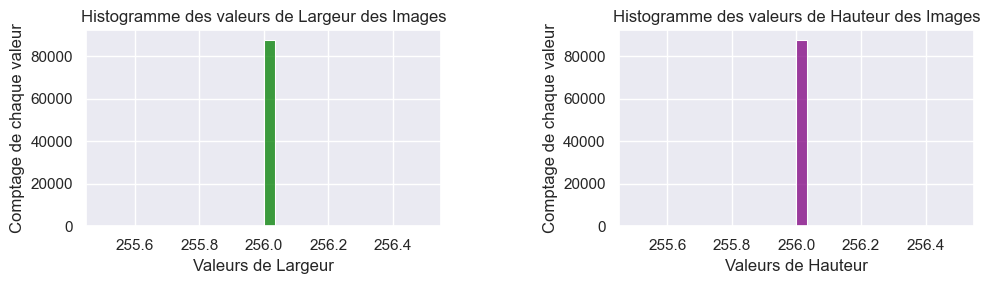

In [8]:
# Création de deux sous-graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.histplot(data=all_pict_quality_chk, x="Largeur", color='green', bins = 30, ax=axes[0])
axes[0].set_title("Histogramme des valeurs de Largeur des Images")
axes[0].set_xlabel("Valeurs de Largeur")
axes[0].set_ylabel("Comptage de chaque valeur")

sns.histplot(data=all_pict_quality_chk, x="Hauteur", color='purple', bins = 30, ax=axes[1])
axes[1].set_title("Histogramme des valeurs de Hauteur des Images")
axes[1].set_xlabel("Valeurs de Hauteur")
axes[1].set_ylabel("Comptage de chaque valeur")

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

# Affichage du graphique
plt.show()


### 3.4.2.3 Vérification des canaux, du mode, de la profondeur ainsi que de la résolution des images

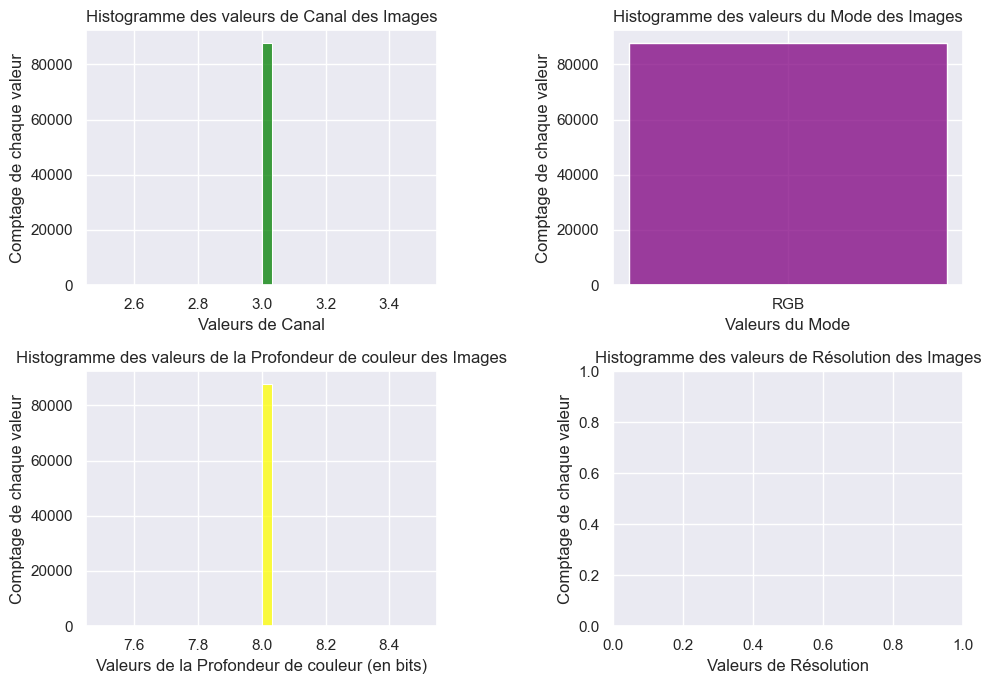

In [9]:
# Création de 4 sous-graphiques "en carrés"
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

sns.histplot(data=all_pict_quality_chk, x="Canaux", color='green', bins = 30, ax=axes[0,0])
axes[0,0].set_title("Histogramme des valeurs de Canal des Images")
axes[0,0].set_xlabel("Valeurs de Canal")
axes[0,0].set_ylabel("Comptage de chaque valeur")

sns.histplot(data=all_pict_quality_chk, x="Mode", color='purple', bins = 30, ax=axes[0,1])
axes[0,1].set_title("Histogramme des valeurs du Mode des Images")
axes[0,1].set_xlabel("Valeurs du Mode")
axes[0,1].set_ylabel("Comptage de chaque valeur")

sns.histplot(data=all_pict_quality_chk, x="Profondeur de couleur (en bits)", color='yellow', bins = 30, ax=axes[1,0])
axes[1,0].set_title("Histogramme des valeurs de la Profondeur de couleur des Images")
axes[1,0].set_xlabel("Valeurs de la Profondeur de couleur (en bits)")
axes[1,0].set_ylabel("Comptage de chaque valeur")

sns.histplot(data=all_pict_quality_chk, x="Résolution", color='blue', bins = 30, ax=axes[1,1])
axes[1,1].set_title("Histogramme des valeurs de Résolution des Images")
axes[1,1].set_xlabel("Valeurs de Résolution")
axes[1,1].set_ylabel("Comptage de chaque valeur")

# Ajustement des espacements entre les sous-graphiques
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)

# Affichage du graphique
plt.show()


### 3.4.2.4 Vérification de la taille des fichiers

__Vérification de la répartition des fichiers, tous "splits" confondus (train, valid et test)__

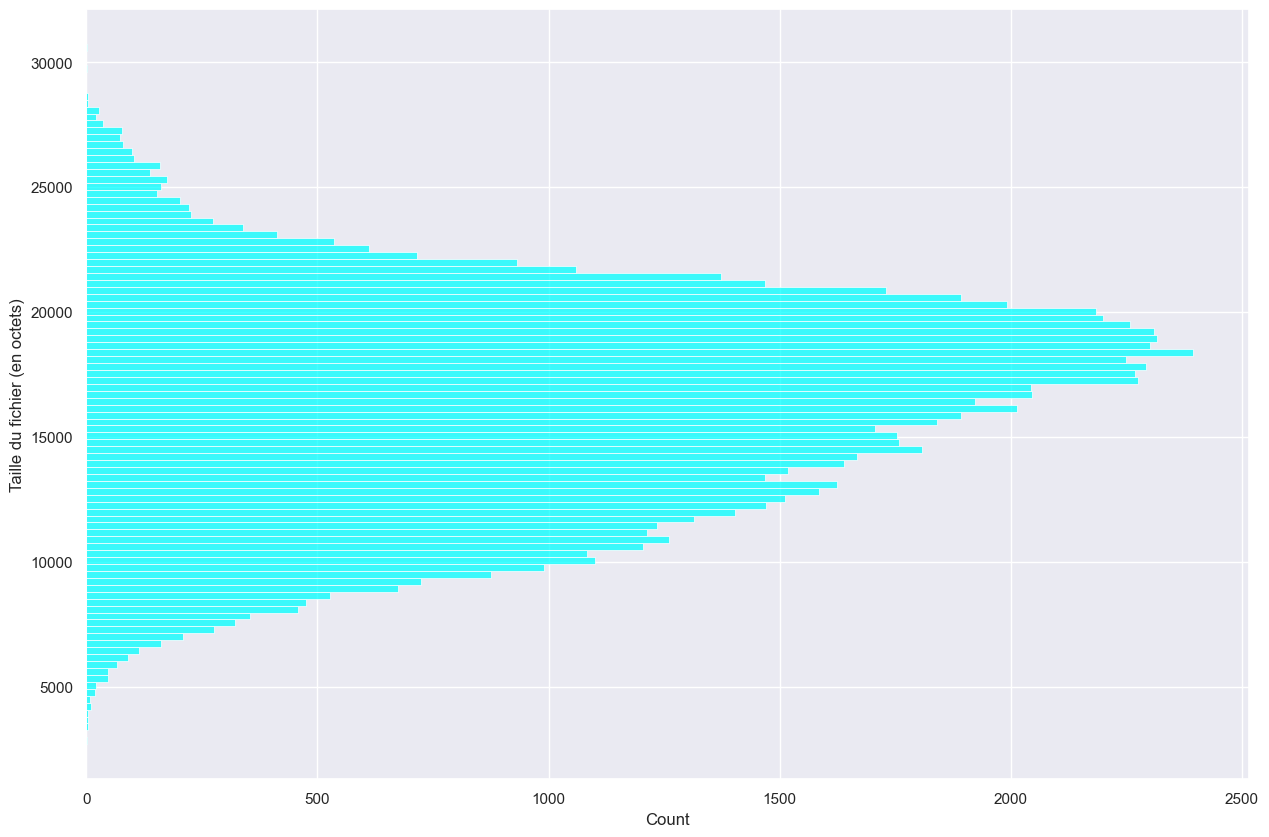

In [10]:
plt.figure(figsize=(15, 10))
sns.histplot(y=all_pict_quality_chk['Taille du fichier (en octets)'], color = 'cyan').set_ylabel("Taille du fichier (en octets)");


__Vérification de la répartition des fichiers, par split et par dossier du split__

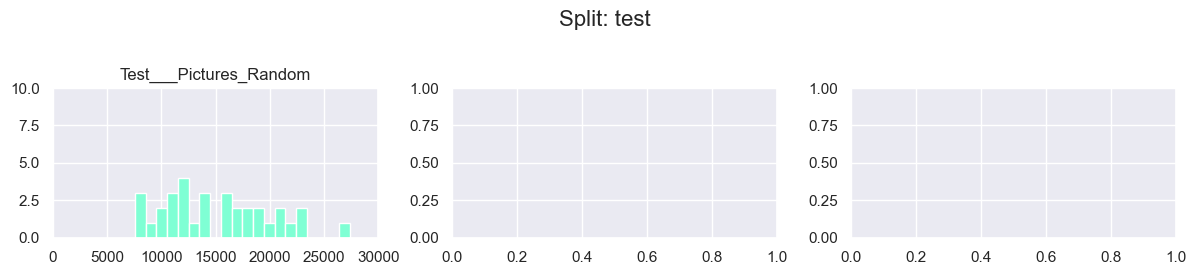

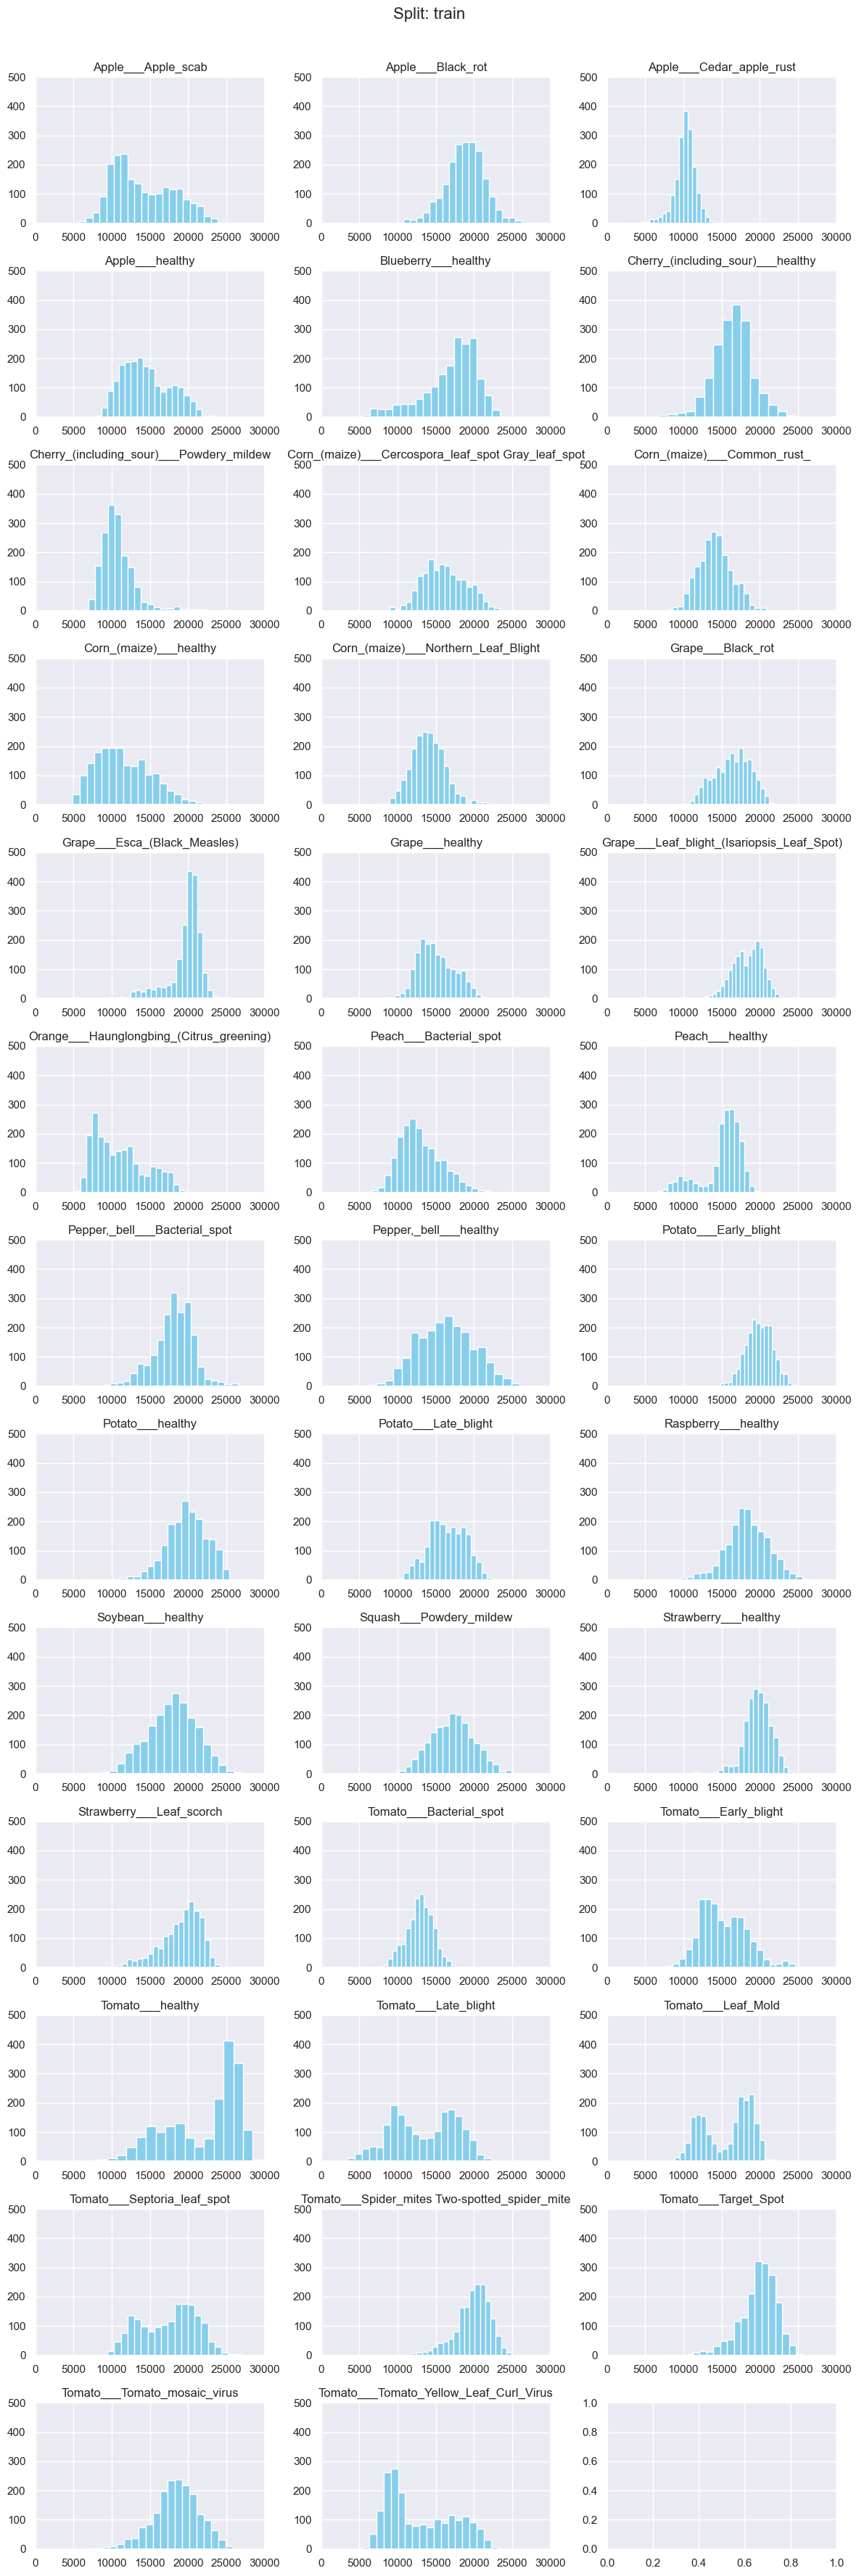

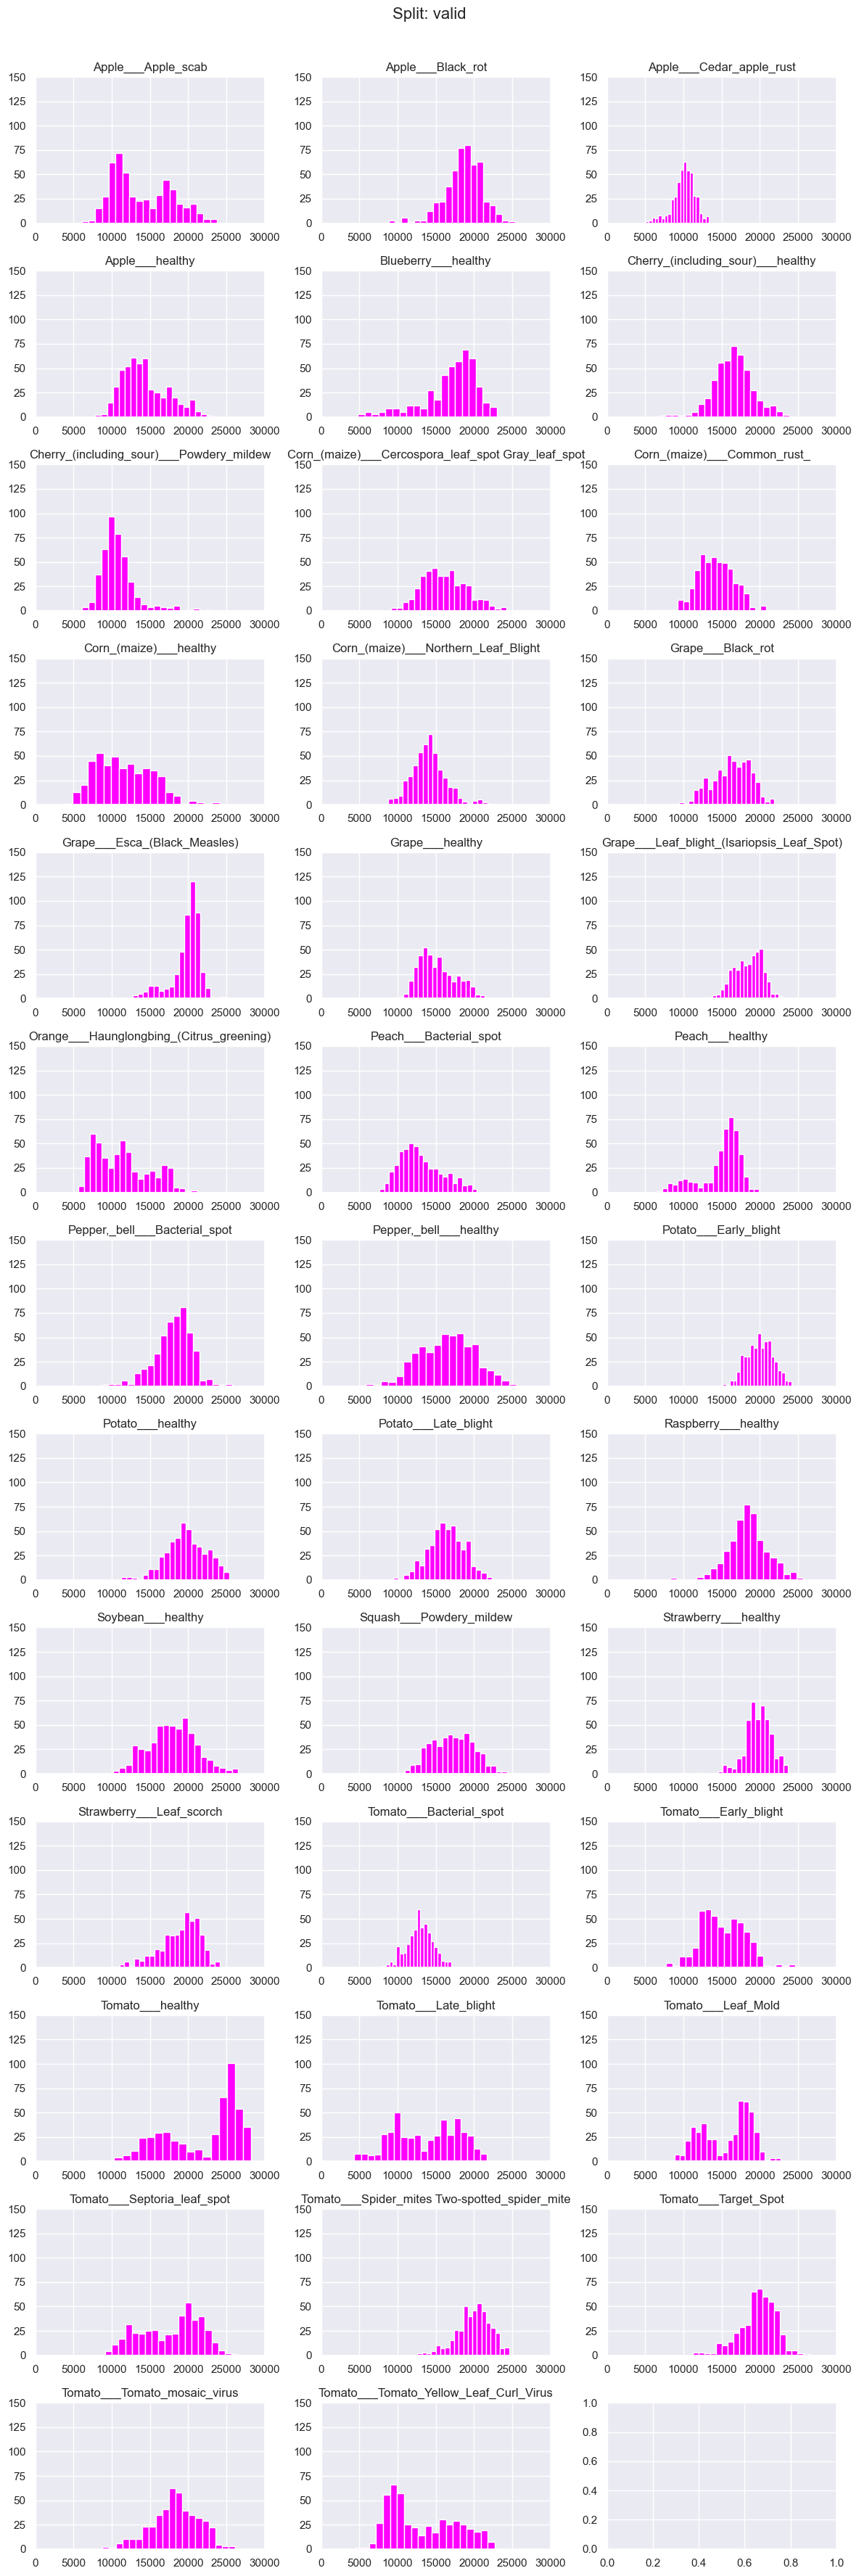

In [11]:
#Listage des modalités de la colonne "Split"
modalites_split = all_pict_quality_chk['Nom du Split'].unique()

#Définition d'une liste de couleurs pour chaque split
couleurs = ['aquamarine', 'skyblue', 'magenta']

#Parcoure les modalités de la colonne "Split"
for i, split in enumerate(modalites_split):
    #Filtre les données pour la modalité de "Split" spécifique
    subset = all_pict_quality_chk[all_pict_quality_chk['Nom du Split'] == split]

    #Liste les répertoires parent uniques pour le split spécifique
    repertoires_parent = subset['Répertoire parent'].unique()

    #Création des sous-plots pour le split spécifique
    num_repertoires = len(repertoires_parent)
    num_cols = 3
    num_rows = (num_repertoires + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 3*num_rows))

    #Parcoure les répertoires parent et créer les histogrammes correspondants
    for j, repertoire in enumerate(repertoires_parent):
        # Sélectionner le sous-plot correspondant
        if num_rows > 1:
            ax = axes[j // num_cols, j % num_cols]
        else:
            ax = axes[j % num_cols]

        #Filtre les données pour le répertoire parent spécifique
        subset_repertoire = subset[subset['Répertoire parent'] == repertoire]

        #Créé l'histogramme des tailles de fichiers en octets pour le répertoire parent
        ax.hist(subset_repertoire['Taille du fichier (en octets)'], bins=20, color=couleurs[i])

        #Défini le titre du sous-plot avec le nom du répertoire parent
        ax.set_title(repertoire)

        #Ajuste la plage de l'axe des ordonnées en fonction du split
        if split == 'test':
            ax.set_ylim(0, 10)
        elif split == 'train':
            ax.set_ylim(0, 500)
        elif split == 'valid':
            ax.set_ylim(0, 150)
        
        #Ajuste la plage de l'axe des abscisses en fonction du split
        if split == 'test':
            ax.set_xlim(0, 30000)
        if split == 'train':
            ax.set_xlim(0, 30000)
        elif split == 'valid':
            ax.set_xlim(0, 30000)

    #Définition du titre global pour le split spécifique
    fig.suptitle(f"Split: {split}", fontsize=16)

    #Ajustement l'espacement entre les sous-plots
    fig.tight_layout(rect=[0, 0.07, 1, 0.975])

    # Affichage les graphiques pour le split spécifique
    plt.show()


### 3.4.2.5 Analyse de la taille des fichiers à l’aide de leurs quartiles

__Création d'une nouvelle fonction permettant de récupérer les informations voulu sur les quartiles 25% et 75% dans un nouveau Dataframe "au niveau des répertoires"__

In [12]:
def calc_stats_img_dir(rep_racine):
    resultats = []
    
    #Parcoure les sous-répertoires dans le répertoire root donné
    for dossier in os.listdir(rep_racine):
        chemin_dossier = os.path.join(rep_racine, dossier)
        
        #Ignore les fichiers qui ne sont pas des répertoires
        if not os.path.isdir(chemin_dossier):
            continue
        
        #Parcoure les répertoires dans le sous-répertoire
        for repertoire in os.listdir(chemin_dossier):
            chemin_repertoire = os.path.join(chemin_dossier, repertoire)
            
            #Ignore les fichiers qui ne sont pas des répertoires
            if not os.path.isdir(chemin_repertoire):
                continue
            
            #Récupère les informations sur le répertoire
            fichiers = os.listdir(chemin_repertoire)
            nombre_fichiers = len(fichiers)
            
            #Calcul de la taille totale des fichiers
            taille_totale = sum(os.path.getsize(os.path.join(chemin_repertoire, fichier)) for fichier in fichiers)
            
            #Calcul des quartiles des tailles de fichiers
            tailles = [os.path.getsize(os.path.join(chemin_repertoire, fichier)) for fichier in fichiers]
            quartile_25 = np.percentile(tailles, 25)
            quartile_75 = np.percentile(tailles, 75)
            
            #Calcul de la moyenne entre les quartiles 25% et 75%
            moyenne_quartiles = (quartile_25 + quartile_75) / 2
            
            #Ajout des résultats à la liste éponyme
            resultats.append({
                'Répertoire Parent': dossier,
                'Répertoire': repertoire,
                'Nombre de fichiers': nombre_fichiers,
                'Taille totale': taille_totale,
                'Quartile 25%': quartile_25,
                'Quartile 75%': quartile_75,
                'Moyenne quartiles': moyenne_quartiles
            })

    #Création du DataFrame output
    df = pd.DataFrame(resultats)

    return df


In [13]:
folder_img_stats = calc_stats_img_dir(root_pict_chk)


In [14]:
folder_img_stats


,Répertoire Parent,Répertoire,Nombre de fichiers,Taille totale,Quartile 25%,Quartile 75%,Moyenne quartiles
0,test,Test___Pictures_Random,33,504403,11410.00,18485.00,14947.50
1,train,Apple___Apple_scab,2016,28379282,10788.75,17349.25,14069.00
2,train,Apple___Black_rot,1987,37370522,17313.50,20471.50,18892.50
3,train,Apple___Cedar_apple_rust,1760,17927431,9589.50,10988.00,10288.75
4,train,Apple___healthy,2008,29129038,12037.50,16870.50,14454.00
...,...,...,...,...,...,...,...
72,valid,Tomato___Septoria_leaf_spot,436,7710584,14351.50,20846.00,17598.75
73,valid,Tomato___Spider_mites Two-spotted_spider_mite,435,8667452,18679.00,21469.50,20074.25
74,valid,Tomato___Target_Spot,457,9009486,18375.00,21339.00,19857.00
75,valid,Tomato___Tomato_mosaic_virus,448,8187843,16280.25,20424.75,18352.50


__Analyses sur les Quartiles des tailles de fichiers__

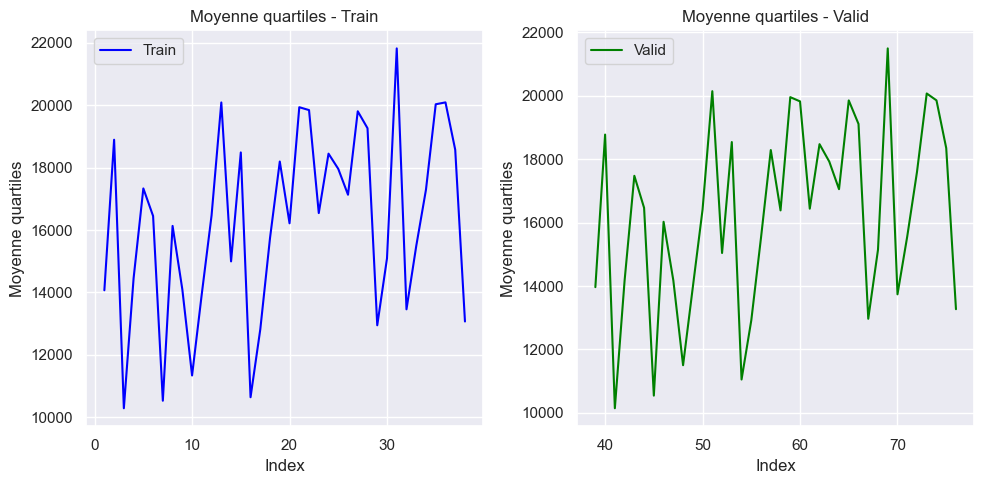

In [15]:
#Récupération des données des splits train et valid
moyenne_quartiles_train = folder_img_stats[folder_img_stats['Répertoire Parent'] == 'train']['Moyenne quartiles']
moyenne_quartiles_valid = folder_img_stats[folder_img_stats['Répertoire Parent'] == 'valid']['Moyenne quartiles']

#Création des sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#On trace la courbe pour train
ax1.plot(moyenne_quartiles_train, label='Train', color='blue')
ax1.set_xlabel('Index')
ax1.set_ylabel('Moyenne quartiles')
ax1.set_title('Moyenne quartiles - Train')
ax1.legend()

#On trace la courbe pour test
ax2.plot(moyenne_quartiles_valid, label='Valid', color='green')
ax2.set_xlabel('Index')
ax2.set_ylabel('Moyenne quartiles')
ax2.set_title('Moyenne quartiles - Valid')
ax2.legend()

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

#Affichage du graphique
plt.show()


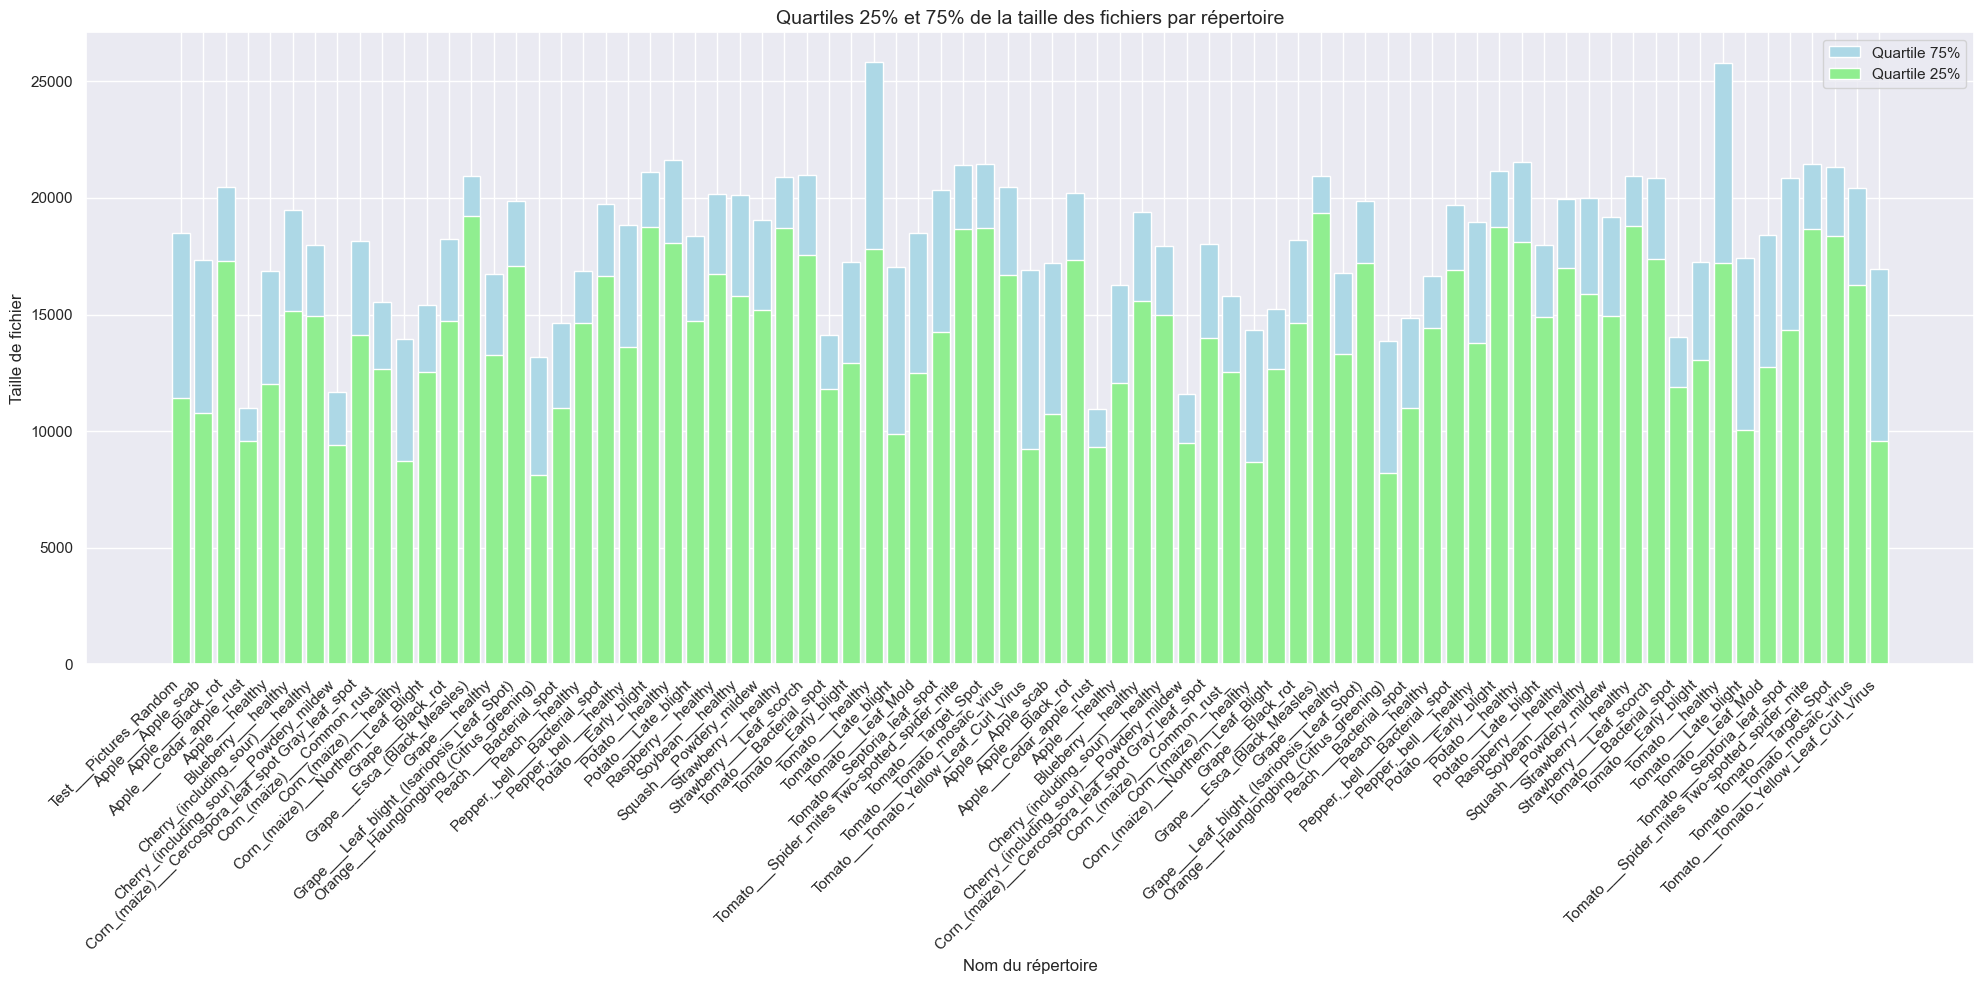

In [16]:
#Création d'un graphique à barres
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(folder_img_stats.index, folder_img_stats['Quartile 75%'], color='lightblue', label='Quartile 75%')
ax.bar(folder_img_stats.index, folder_img_stats['Quartile 25%'], color='lightgreen', label='Quartile 25%')

#Configuration des axes et des labels
ax.set_xlabel('Nom du répertoire', fontsize=12)
ax.set_ylabel('Taille de fichier', fontsize=12)
ax.set_xticks(folder_img_stats.index)
ax.set_xticklabels(folder_img_stats['Répertoire'], rotation=45, ha='right')
ax.set_title('Quartiles 25% et 75% de la taille des fichiers par répertoire', fontsize=14)

#Ajout de la légende
ax.legend()

#Affichage du graphique
plt.tight_layout()
plt.show()


### 3.4.2.6 Rapide analyse des moyennes des valeurs de couleur de chaque image

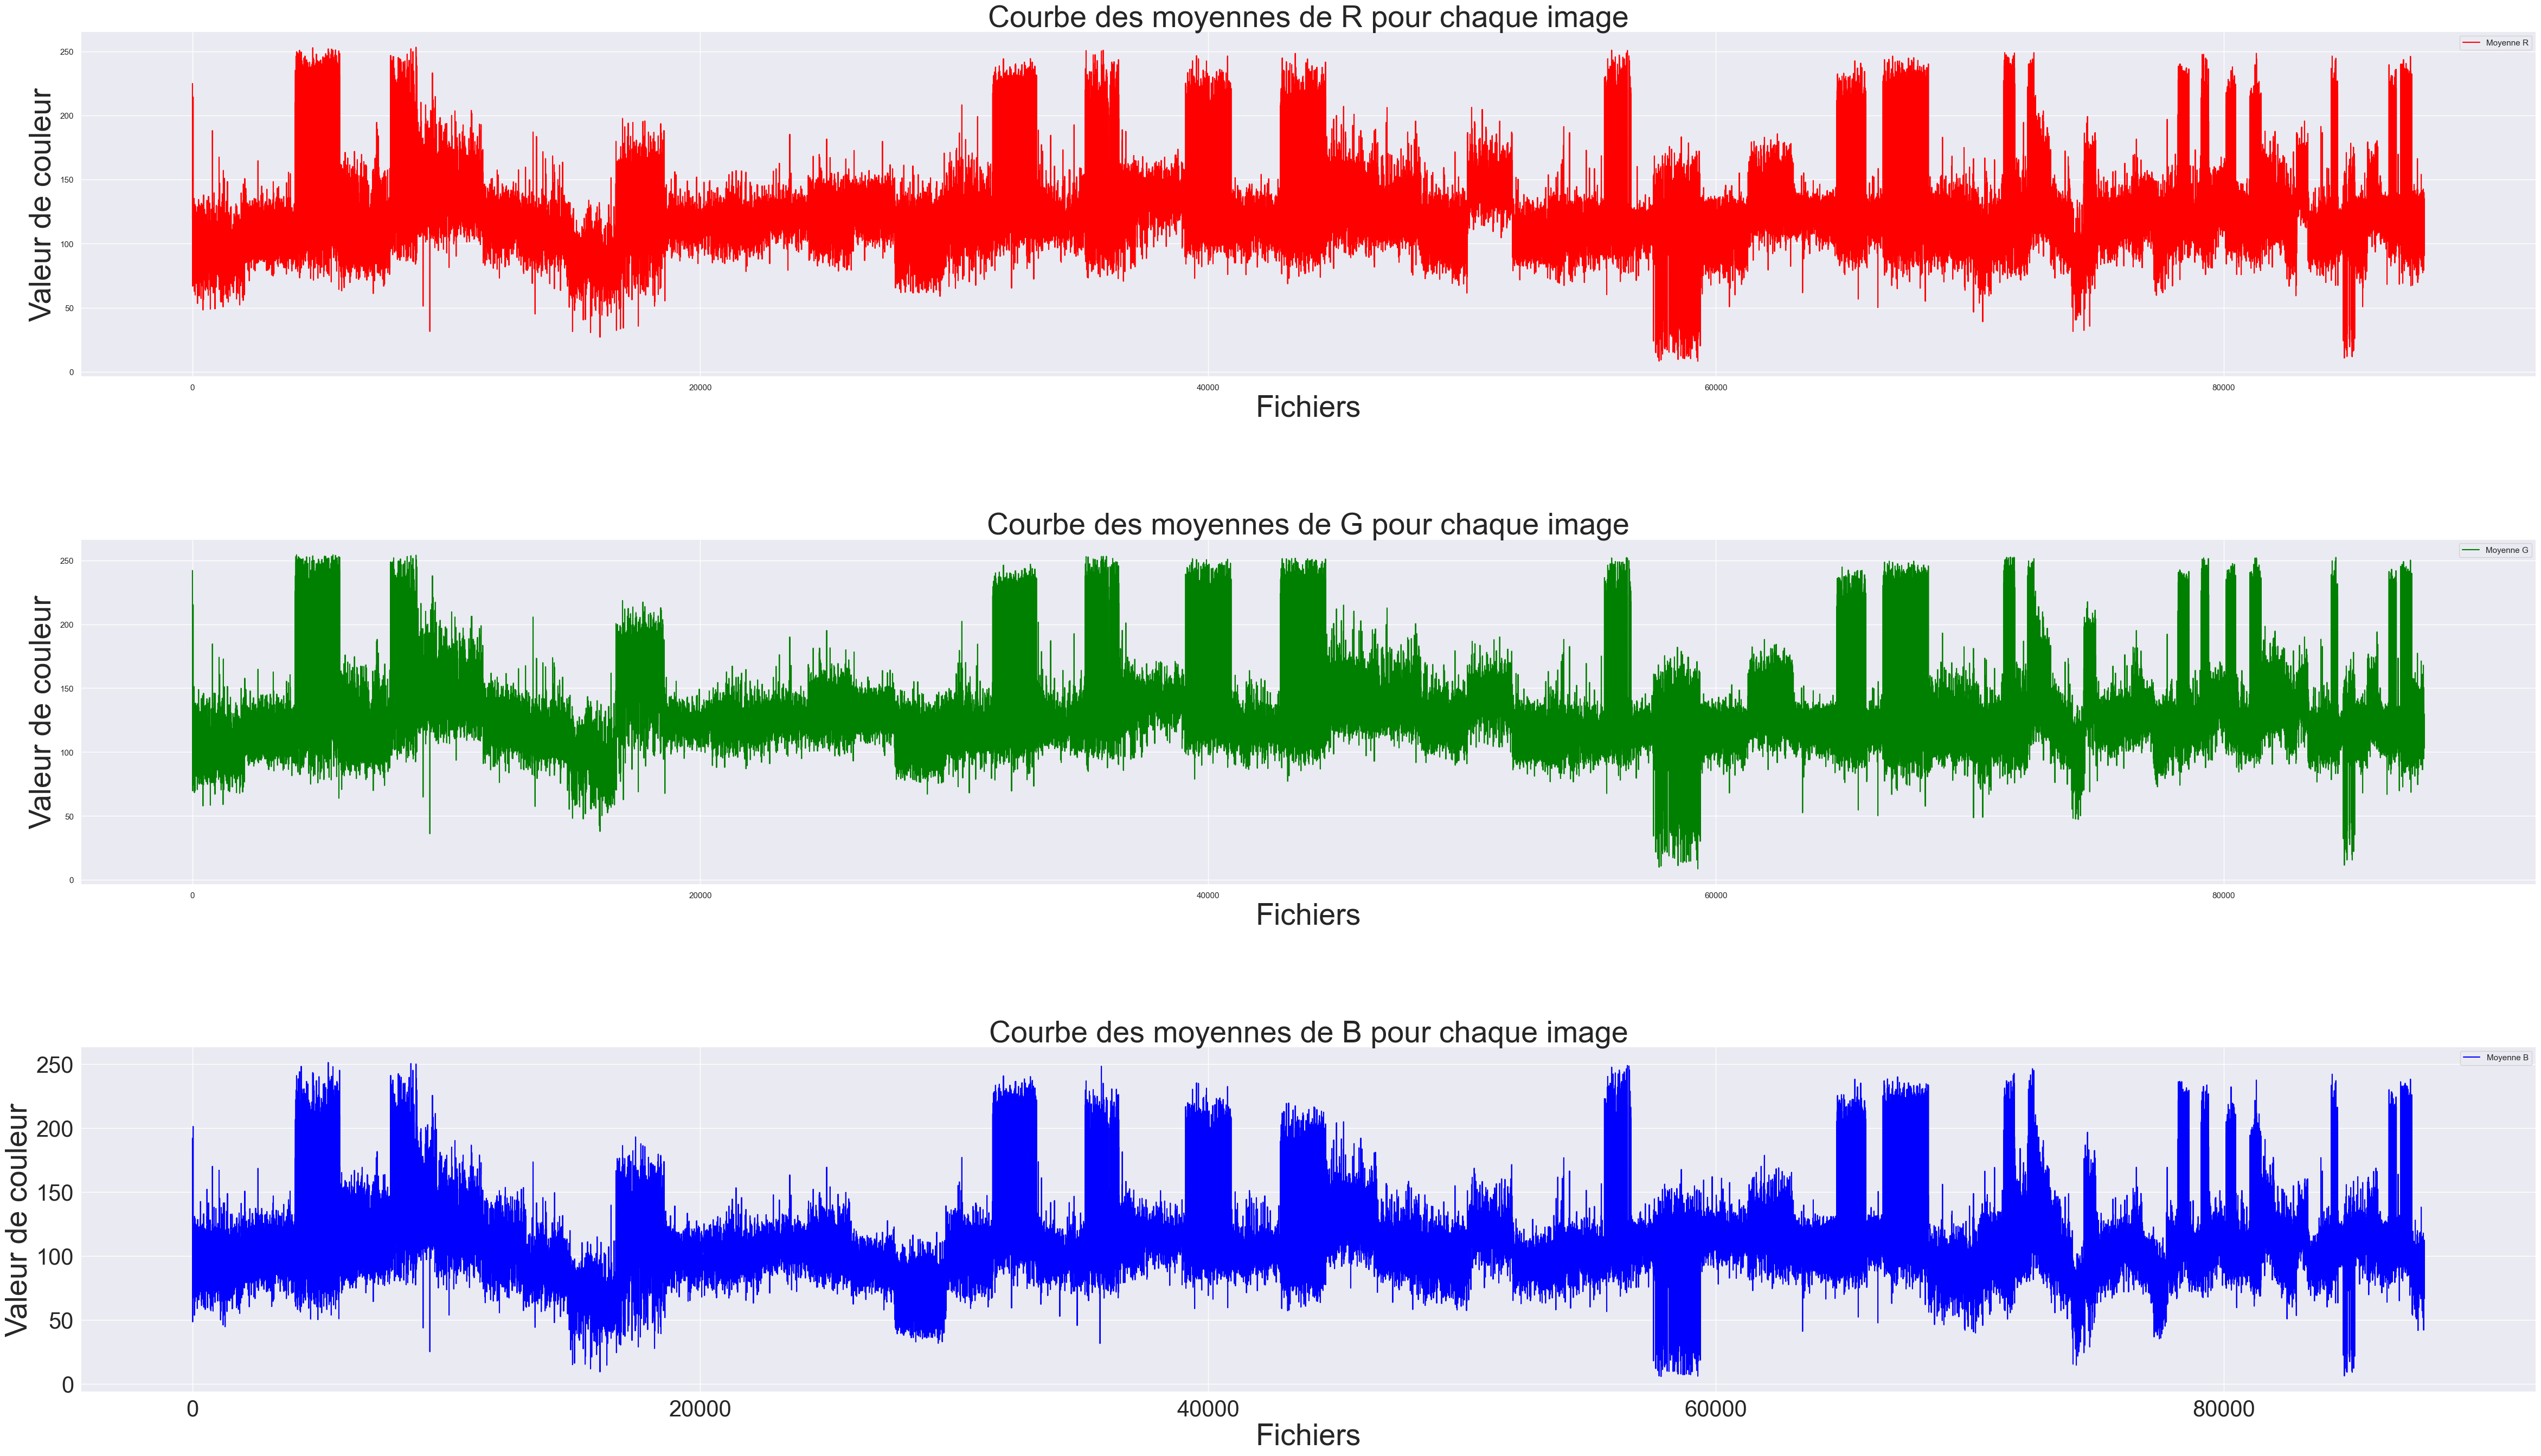

In [17]:
# Création de 3 sous-graphiques en ligne
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(50,30))

plt.xlabel("Fichiers", fontsize=40)
plt.ylabel("Valeur de couleur", fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

#On trace les courbes pour chaque sous-graphique
axes[0].plot(all_pict_quality_chk["Moyenne R"], label="Moyenne R", color='red')
axes[1].plot(all_pict_quality_chk["Moyenne G"], label="Moyenne G", color='green')
axes[2].plot(all_pict_quality_chk["Moyenne B"], label="Moyenne B", color='blue')

axes[0].legend()
axes[1].legend()
axes[2].legend()

axes[0].set_title("Courbe des moyennes de R pour chaque image", fontsize=40)
axes[1].set_title("Courbe des moyennes de G pour chaque image", fontsize=40)
axes[2].set_title("Courbe des moyennes de B pour chaque image", fontsize=40)

axes[0].set_xlabel("Fichiers", fontsize=40)
axes[1].set_xlabel("Fichiers", fontsize=40)
axes[2].set_xlabel("Fichiers", fontsize=40)

axes[0].set_ylabel("Valeur de couleur", fontsize=40)
axes[1].set_ylabel("Valeur de couleur", fontsize=40)
axes[2].set_ylabel("Valeur de couleur", fontsize=40)

#Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout(pad=10)

#Affichage les graphiques
plt.show()
